In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?select=ds_salaries.csv

# Data Science Job Salaries
## Salaries of jobs in the Data Science domain

- work_year: 	The year the salary was paid.
-  The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- employment_type: 	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title: 	The role worked in during the year.
- salary: 	The total gross salary amount paid.
- salary_currency: 	The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd: 	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- employee_residence: 	Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: 	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- company_location: 	The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size: 	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/leonardoomarbolanosrivera/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1


In [3]:
# Reading data and removing index col
df = pd.read_csv(f"{path}/ds_salaries.csv",index_col=0)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
def graph_continues_types(df,colName):
    fig,ax = plt.subplots(2,2,figsize=(8,6))
    fig.autofmt_xdate()
    sns.histplot(data=df,x=colName,kde=True,ax=ax[0,0]) #visualiza densidad de kernel
    sns.boxplot(x=df[colName],ax=ax[0,1],showmeans=True)
    sns.barplot(data=df, y=colName,err_kws={'color': 'orange'},ax=ax[1,0])
    sns.violinplot(x=df[colName],ax=ax[1,1]) # por defecto dibuja un boxplot en miniatura

In [8]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

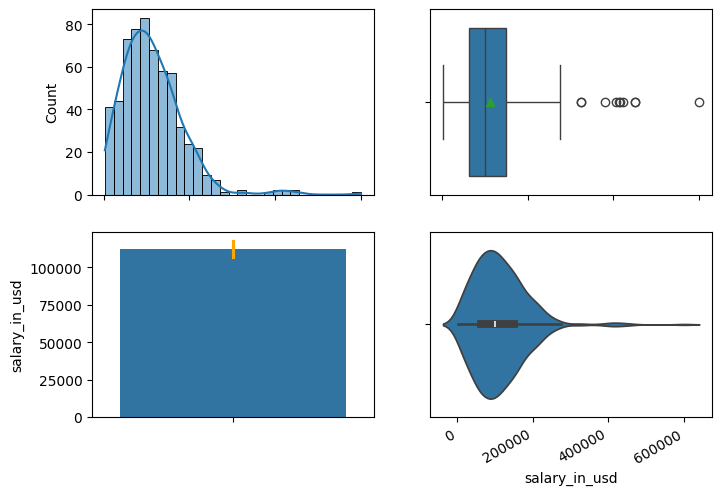

In [9]:
graph_continues_types(df,'salary_in_usd')

In [10]:
df['experience_level'].value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [11]:
df[(df['employee_residence']=='MX')]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S


In [12]:
df['employment_type'].value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

In [13]:
df['remote_ratio'].value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

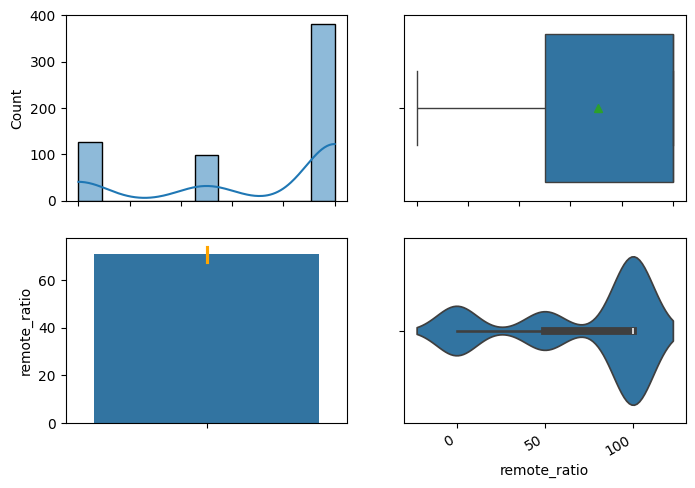

In [14]:
graph_continues_types(df,'remote_ratio')

In [15]:
df['company_location'].value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [16]:
df['company_size'].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64